In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

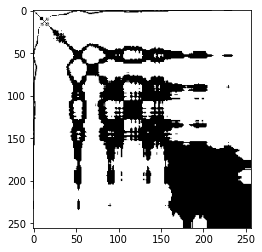

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [13]:
learning_rate = 3e-5
optimizer='Adam'
loss='mse'
image_size = 256 #1024, 256
dimension = 16 # ...

In [14]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent

# X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
activation_9 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)       

In [15]:
batch_size = 10
epochs = 5000

In [16]:
hist = autoencoder.train(X_train,batch_size,epochs,X_test)

Epoch 1/5000
148/149 [============================>.] - ETA: 0s - loss: 0.2471
Epoch 00001: val_loss improved from inf to 0.24128, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 13s 89ms/step - loss: 0.2471 - val_loss: 0.2413
Epoch 2/5000
148/149 [============================>.] - ETA: 0s - loss: 0.2272
Epoch 00002: val_loss improved from 0.24128 to 0.21139, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 13s 85ms/step - loss: 0.2272 - val_loss: 0.2114
Epoch 3/5000
148/149 [============================>.] - ETA: 0s - loss: 0.2048
Epoch 00003: val_loss improved from 0.21139 to 0.20224, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 12s 83ms/step - loss: 0.2048 - val_loss: 0.2022
Epoch 4/

149/149 [==============================] - 13s 85ms/step - loss: 0.1983 - val_loss: 0.1984
Epoch 26/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1982
Epoch 00026: val_loss improved from 0.19840 to 0.19836, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 13s 84ms/step - loss: 0.1982 - val_loss: 0.1984
Epoch 27/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1982
Epoch 00027: val_loss improved from 0.19836 to 0.19826, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 12s 84ms/step - loss: 0.1982 - val_loss: 0.1983
Epoch 28/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1981
Epoch 00028: val_loss improved from 0.19826 to 0.19822, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
1

Epoch 51/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1973
Epoch 00051: val_loss improved from 0.19755 to 0.19751, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 12s 84ms/step - loss: 0.1973 - val_loss: 0.1975
Epoch 52/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1972
Epoch 00052: val_loss did not improve from 0.19751
149/149 [==============================] - 11s 75ms/step - loss: 0.1973 - val_loss: 0.1975
Epoch 53/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1972
Epoch 00053: val_loss improved from 0.19751 to 0.19748, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 13s 84ms/step - loss: 0.1973 - val_loss: 0.1975
Epoch 54/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1973
Epoch 00054: val_loss did not im

INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 12s 83ms/step - loss: 0.1967 - val_loss: 0.1972
Epoch 80/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1967
Epoch 00080: val_loss improved from 0.19719 to 0.19719, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 13s 85ms/step - loss: 0.1967 - val_loss: 0.1972
Epoch 81/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1967
Epoch 00081: val_loss did not improve from 0.19719
149/149 [==============================] - 11s 77ms/step - loss: 0.1966 - val_loss: 0.1972
Epoch 82/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1966
Epoch 00082: val_loss did not improve from 0.19719
149/149 [==============================] - 11s 77ms/step - loss: 0.1966 - val_loss: 0.1972
Epoch 83/5000
148/149 [============================>.] - ETA: 0s -

148/149 [============================>.] - ETA: 0s - loss: 0.1960
Epoch 00111: val_loss did not improve from 0.19708
149/149 [==============================] - 11s 75ms/step - loss: 0.1961 - val_loss: 0.1972
Epoch 112/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1960
Epoch 00112: val_loss did not improve from 0.19708
149/149 [==============================] - 11s 75ms/step - loss: 0.1960 - val_loss: 0.1971
Epoch 113/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1960
Epoch 00113: val_loss did not improve from 0.19708
149/149 [==============================] - 11s 75ms/step - loss: 0.1960 - val_loss: 0.1971
Epoch 114/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1960
Epoch 00114: val_loss improved from 0.19708 to 0.19708, saving model to insectWing_dimension_16
INFO:tensorflow:Assets written to: insectWing_dimension_16\assets
149/149 [==============================] - 13s 84ms/step - loss: 0.1960 - val_loss: 0.1971
Epoch 115/50

Epoch 146/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1955
Epoch 00146: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1955 - val_loss: 0.1971
Epoch 147/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1954
Epoch 00147: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1954 - val_loss: 0.1971
Epoch 148/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1954
Epoch 00148: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1954 - val_loss: 0.1971
Epoch 149/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1954
Epoch 00149: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1954 - val_loss: 0.1971
Epoch 150/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1954
Epoch 00150: val_loss did n

Epoch 183/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1949
Epoch 00183: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1949 - val_loss: 0.1973
Epoch 184/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1949
Epoch 00184: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1949 - val_loss: 0.1973
Epoch 185/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1949
Epoch 00185: val_loss did not improve from 0.19706
149/149 [==============================] - 11s 75ms/step - loss: 0.1949 - val_loss: 0.1973
Epoch 00185: early stopping


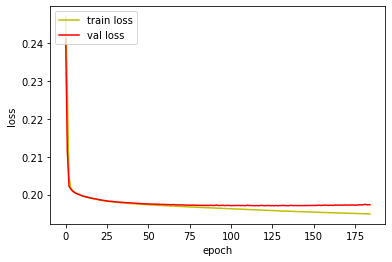

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [28]:
features = np.empty((0,16), float)
for i in range(66):
    features = np.append(features, autoencoder.feature_extract(X_scaled[i*30:(i+1)*30]), axis=0)

print(features.shape)

(1980, 16)


In [45]:
from sklearn.cluster import KMeans
result = KMeans(n_clusters=11).fit(features)

In [46]:
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)
print(result.labels_)

[ 3 10  1  4  4  5  1  1  8  4  9  2  3  7  0  5  1  7  2 10  4  4 10  2
  0  4  1  4  4  7  0  0  4  4  0  0  2  4  1  5  3  9  8  4  0  1  0  9
  7 10  4  9  9  3  4  4  0  0  1  5  4  4  0 10  7  6  6  4  8  0  2  2
  4  5  0  0  6  5  5 10  1  9  0  0  1  4  1  1  1  4  4  4  7  4  0  4
  4  1  1  6  1  1  3 10  4  0  4  4  5  4  4  4  6  0  0  5  5  2  8  0
  4  9  2  4  2  1 10  2  5  4  3  3 10  9  2  5  0  4 10  0  2  0  0  2
  4  9  7  8  1  0  0  7  9  4  2  1  3  7  1  5  0  4  9  9  9  4  3  3
  2  2  9 10 10  5  4  0  5  4  2  4  9  0  1  4  0  6 10  4  6  4  1  0
  6  1  4  0  1  9  5  6  0 10  0  4  4  6  4  0  9  0 10  1  4  4  1 10
 10  9  4  1  4  7  2 10  5  4  2  3  9  3  2 10  0  2  4  1  1  9  4  3
  1  0  9  6  6 10  9 10  0  5  4  0  4  7  1 10  3  0  9  1  3  1  4  9
  1  2  4  2  0  0  8 10  1  4  4  4  7  9 10  0  4  1  9  5  0  4  1  0
  8 10  4  4  4  4  1  9  0  0  1  9  4  9  3  1  1  6  5  5  1  1  9  4
  1  4  9  5  5  1  9  1  1  9  4  1  6 10  1  2  0

In [48]:
import numpy as np
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km.labels_)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(X, y_km.labels_,metric='euclidean')
    print(silhouette_vals)
#     y_ax_lower, y_ax_upper = 0,0
#     yticks = []
    
#     for i , c in enumerate(cluster_labels):
#         c_silhouette_vals = silhouette_vals[y_km.labels_ == c]
#         c_silhouette_vals.sort()
#         y_ax_upper += len(c_silhouette_vals)
#         color = cm.jet(i/n_clusters)
        
#         plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,edgecolor='none', color=color)
#         yticks.append((y_ax_lower + y_ax_upper)/2)
#         y_ax_lower += len(c_silhouette_vals)
    
#     silhouette_avg = np.mean(silhouette_vals)
#     plt.axvline(silhouette_avg, color='red', linestyle='--')
#     plt.yticks(yticks, cluster_labels+1)
#     plt.ylabel('cluster')
#     plt.xlabel('silhouette score')
#     plt.show()

In [47]:
plotSilhouette(features,result)

0.10550198133825563


IndexError: invalid index to scalar variable.

In [50]:
autoencoder.save("insect_16_0.19706.h5")